<a href="https://colab.research.google.com/github/DharmendraYadav96/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike sharing demand prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predict the bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [24]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
path = '/content/mydrive/MyDrive/Dataset/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head(10).T

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

There are 8760 rows and 14 columns

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicated rows.**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

In [9]:
# Visualizing the missing values

### What did you know about your dataset?

- Dependent variable is
- No. of rows and no. of columns
- No missing values in any column and No duplicated values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: Dependent variable
- **Hour**:
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**:
- **Wind speed (m/s)**: (Numerical) Wind speed.
- **Visibility (10m)**: (Numerical)
- **Dew point temperature(°C)**: (Numerical)
- **Solar Radiation (MJ/m2)**: (Numerical)
- **Rainfall(mm)** : (Numerical)
- **Snowfall (cm)** : (Numerical)
- **Seasons** : (Categorical)
- **Holiday** : (Categorical)
- **Functioning Day** : (Categorical)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

1. Convert date column data type to date datatype

In [31]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [32]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

In [33]:
df.head(10).T

0           1           2           3  \
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   
Weekday                             4           4           4           4   
Month                              12          12          12          12   

                                    4           5           6           7  \
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   
Weekday                             4           4           4           4   
Month                              12          12          12          12   

                                    8           9  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes  
Weekday                             4           4  
Month                              12          12

What all manipulations have you done and insights you found?

- Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
numerical_features = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

### **Numerical features Analysis**

---



1. Distribution plot and boxplot of each numerical feature
2. Q-Q plot of each numerical feature
3. scatter plot wrt dependent var to check colinear relation.

#### Chart - 1

Let us draw the distribution of each of the numerical features.
Check the skewness and outliers in the numerical feature

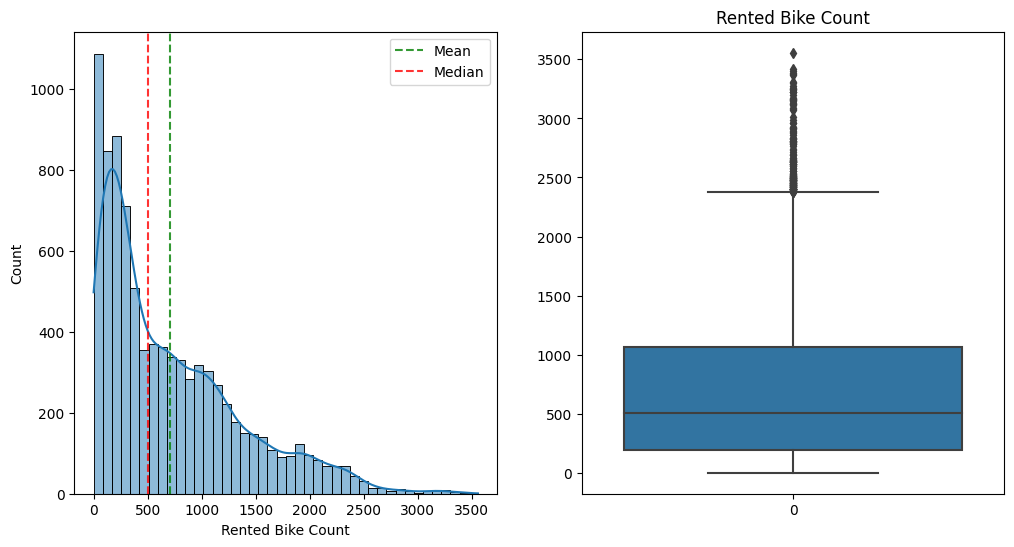

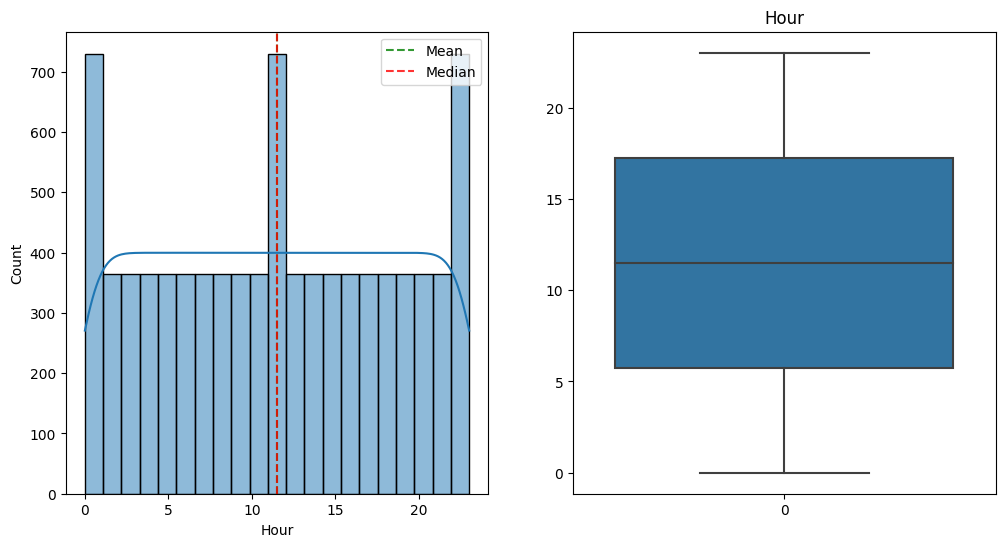

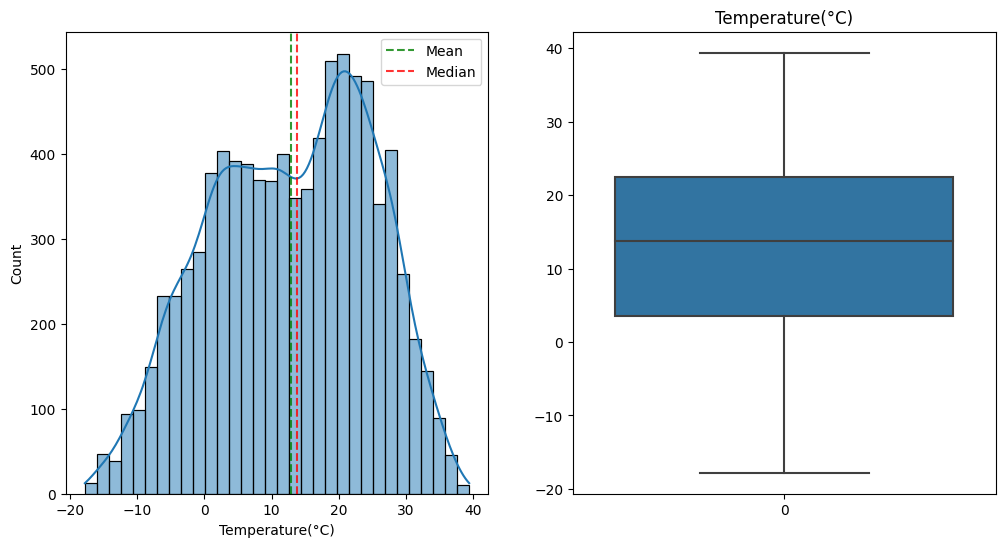

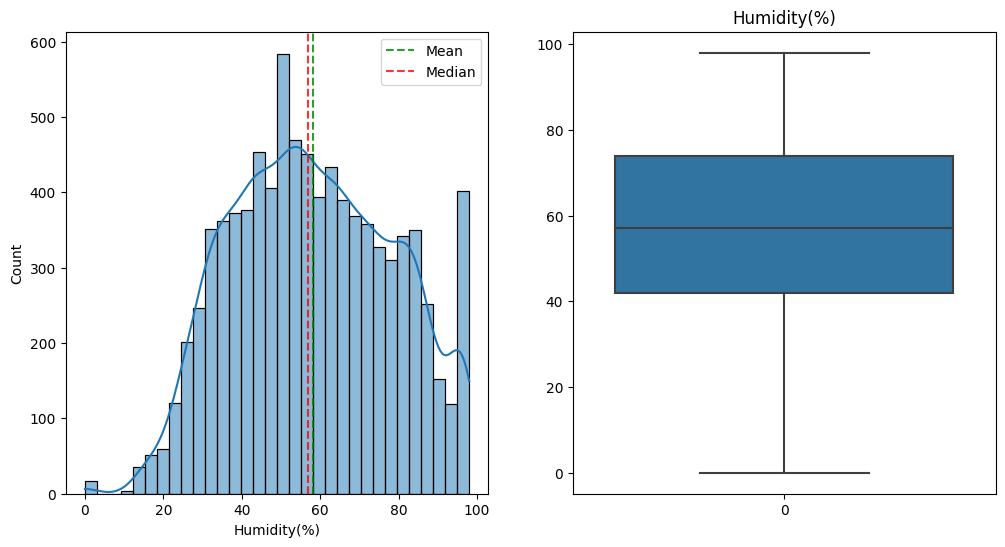

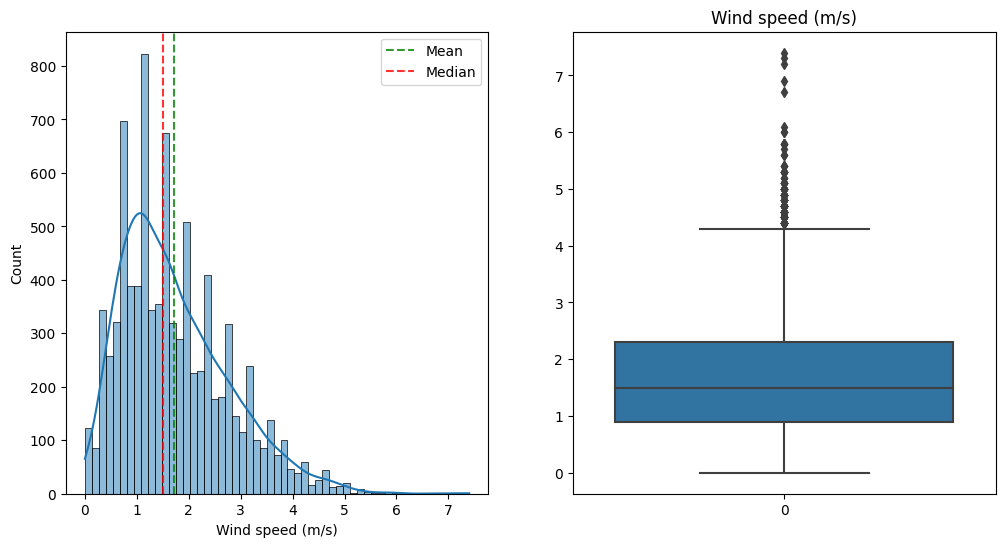

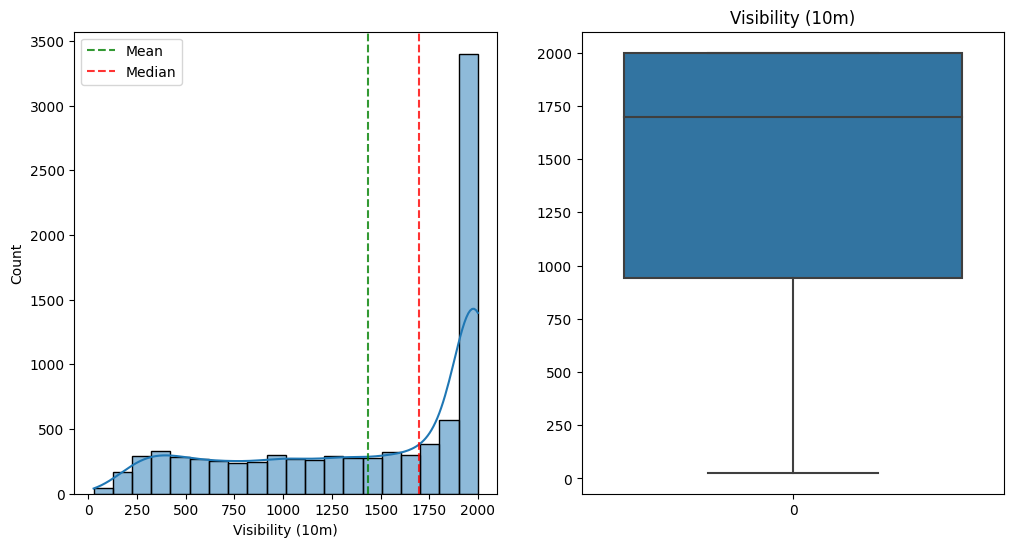

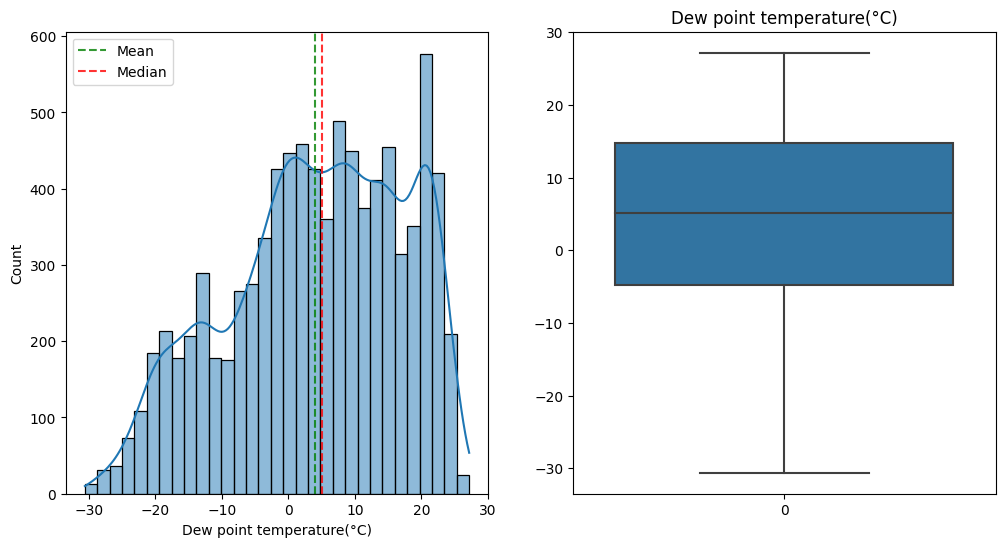

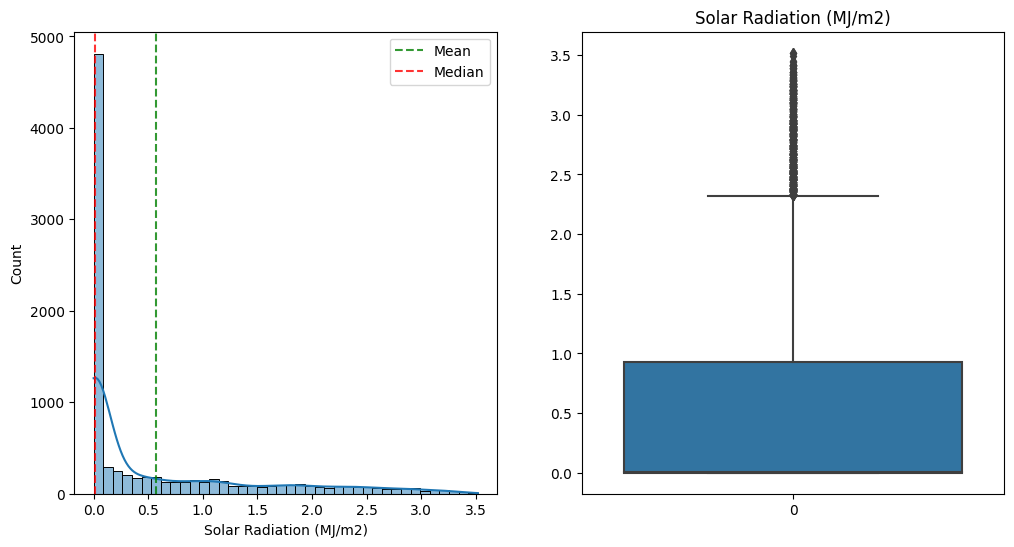

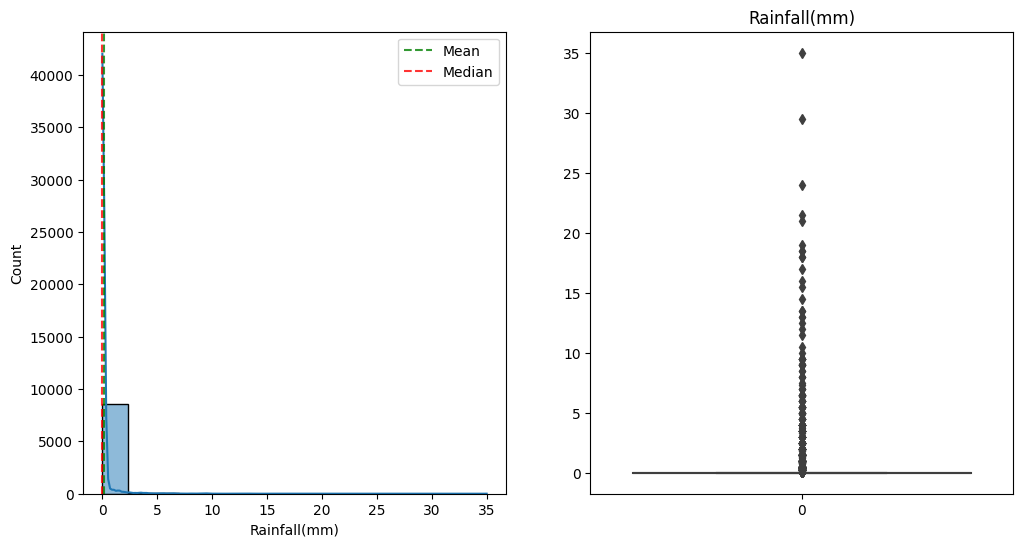

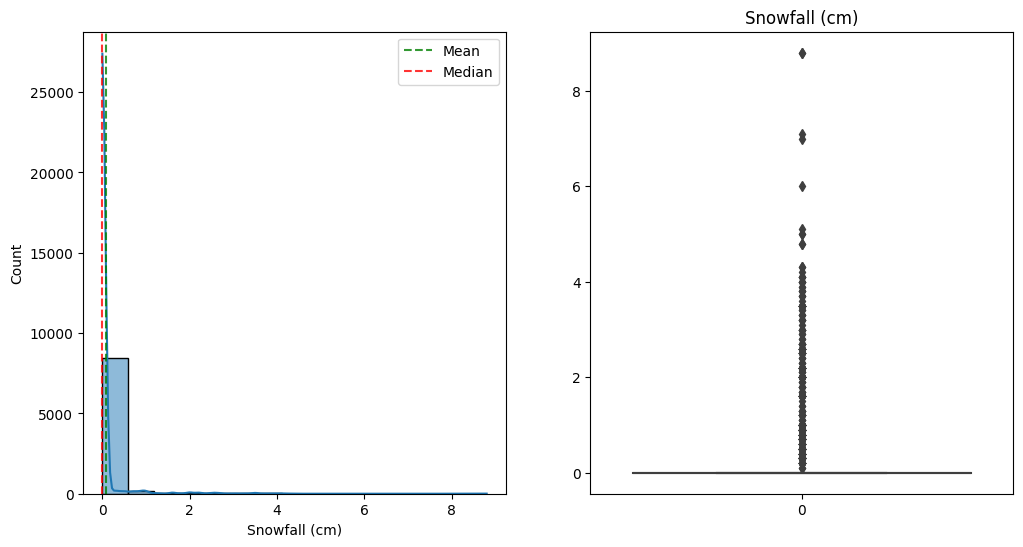

In [34]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    plt.title(feat)

    # Show the plot
    plt.show()

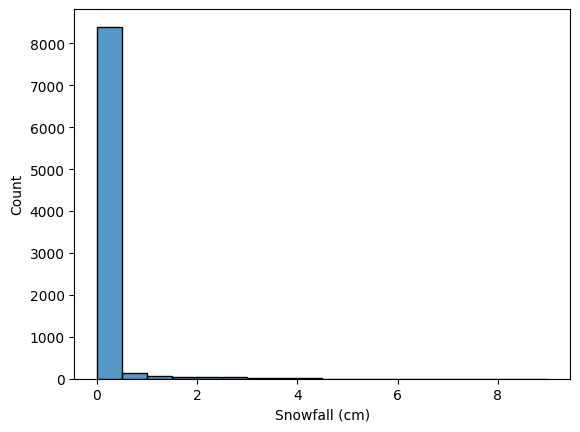

In [35]:
df['Snowfall (cm)'].value_counts()
sns.histplot(df['Snowfall (cm)'], binwidth = 0.5)
plt.show()

In [36]:
df[df['Snowfall (cm)'] > 0.5]['Snowfall (cm)'].count()

329

#####  What is/are the insight(s) found from the chart?

- Rented bike count, Wind speed, Visibility, Solar radiation and Rainfall have skewed distribution.
- Except visibility all of them has outliers.
- Snowfall and Rainfall both are having few values mostly concentrated near 0.


#### Chart - 2
Q-Q Plot: to check the distribution of each numerical type

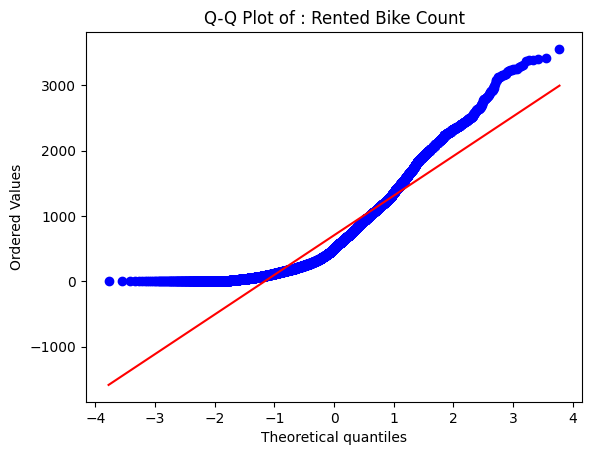

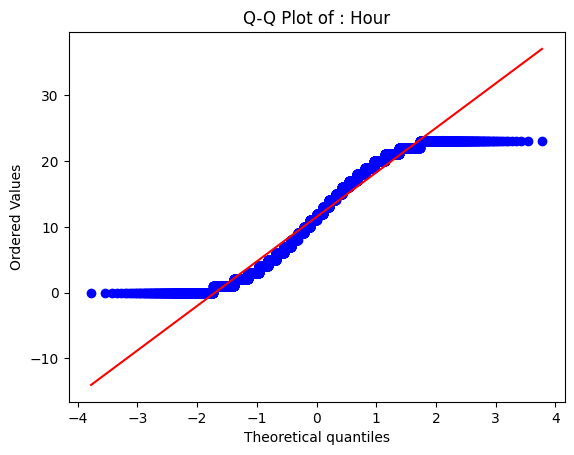

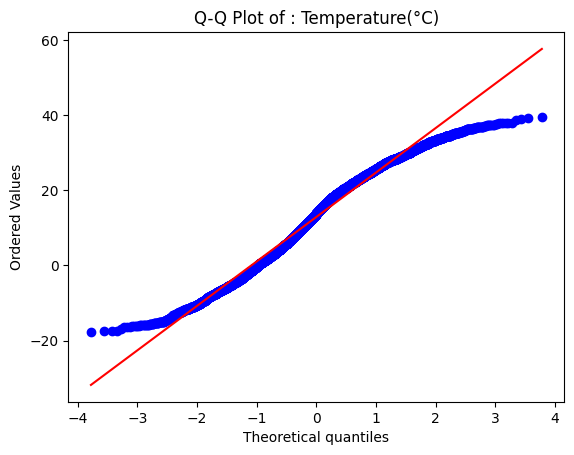

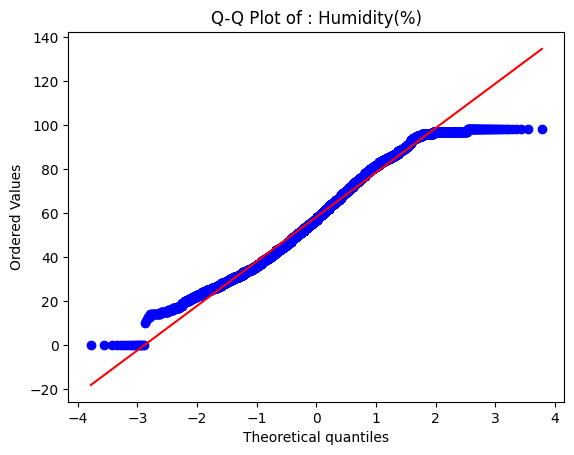

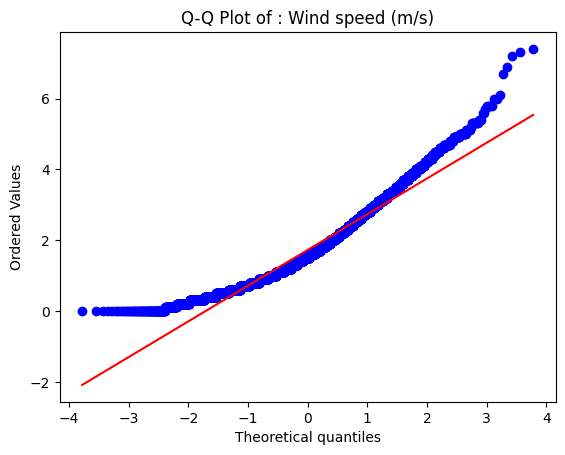

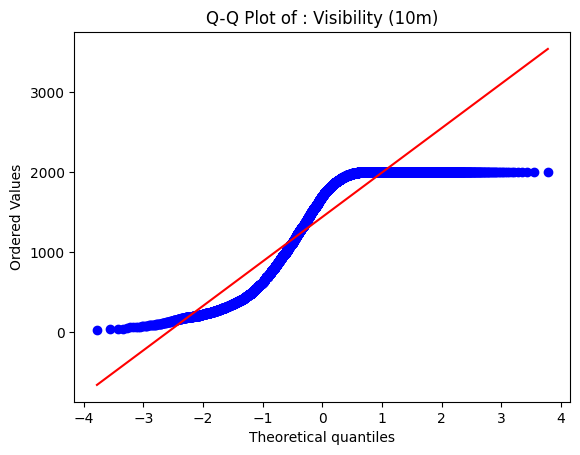

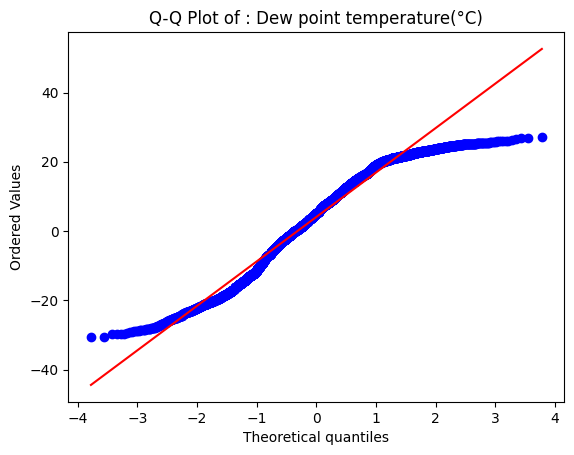

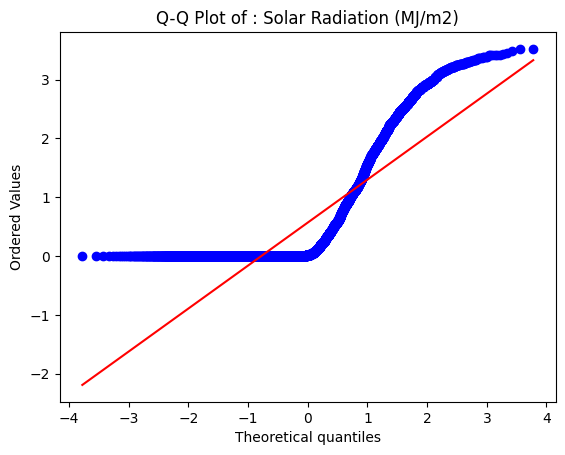

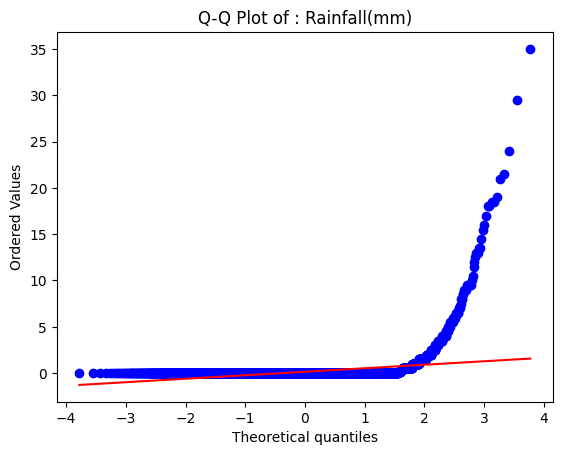

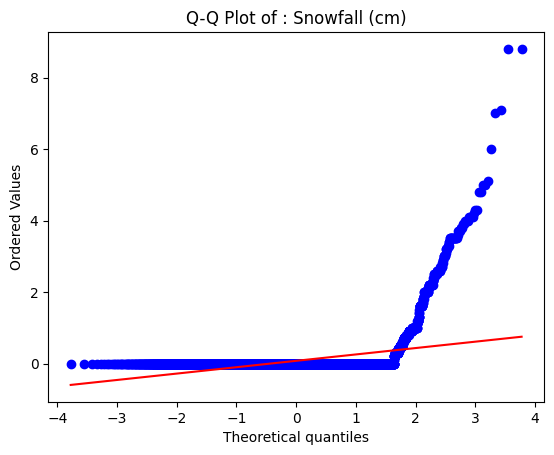

In [37]:
# Q-Q plot for all the numerical features

for feat in numerical_features:

    # Q-Q plot
    stats.probplot(df[feat], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of : {feat}')

    # Show the plot
    plt.show()

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [38]:
# log transformation of rented bike count
data = df['Rented Bike Count']
data_transformed = np.log1p(data)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


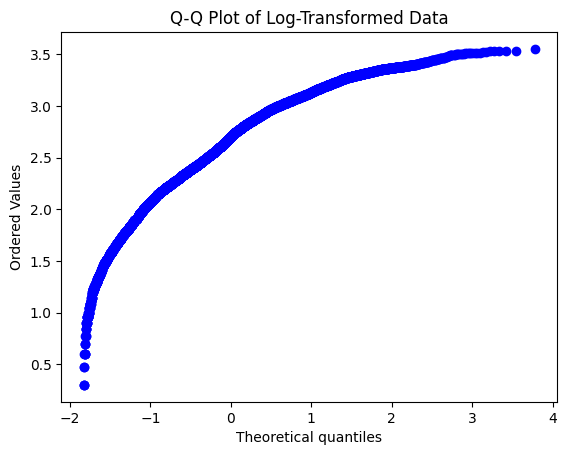

In [39]:
# Q-Q plot after transformation
data_transformed = np.log10(data)
stats.probplot(data_transformed, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Data')
plt.show()

Why did you pick the specific chart?

- Q-Q plot is plotted to know weahter our dataset is normally distributed or not.

What is/are the insight(s) found from the chart?

- Many of the features are not normally distributed.

#### Chart - 3

Let us check the linear relationship between numerical feature and Dependent variable.

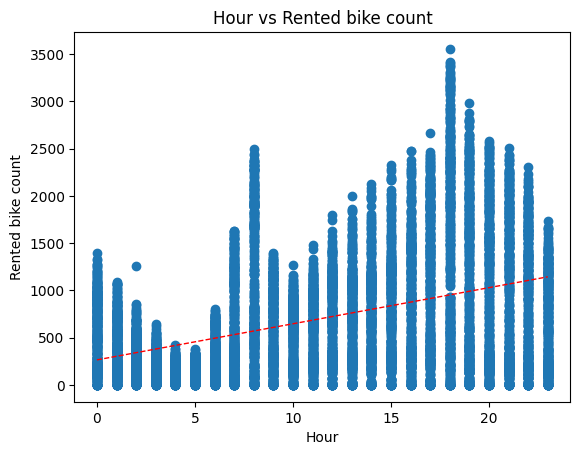

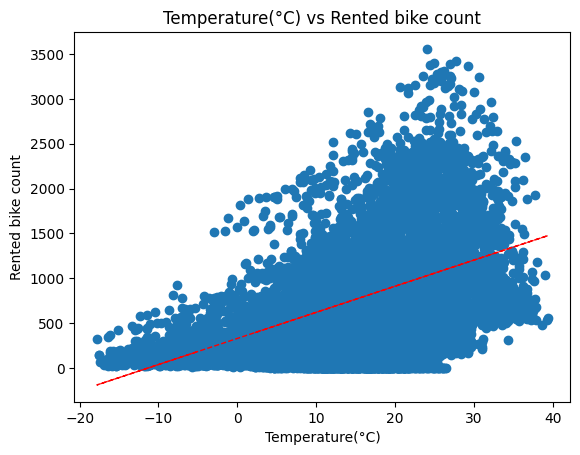

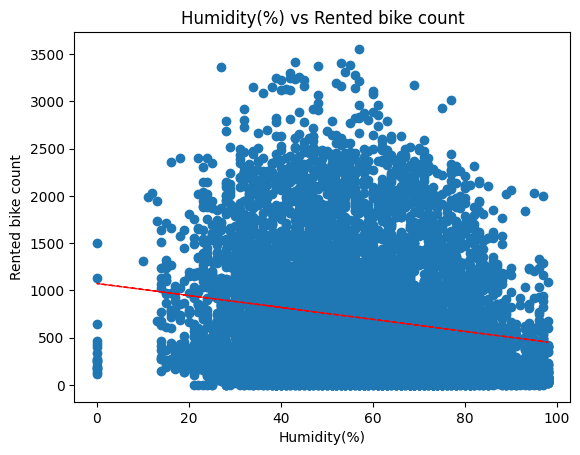

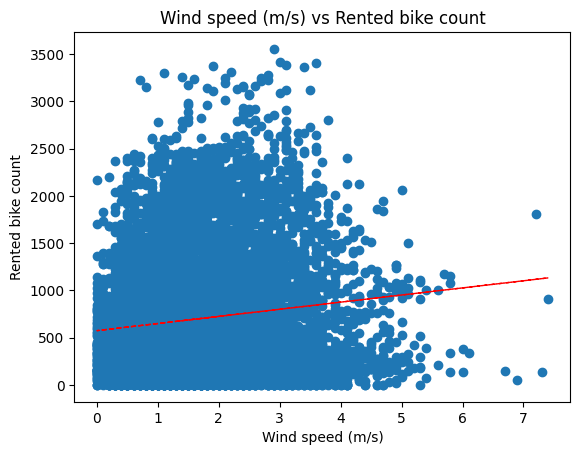

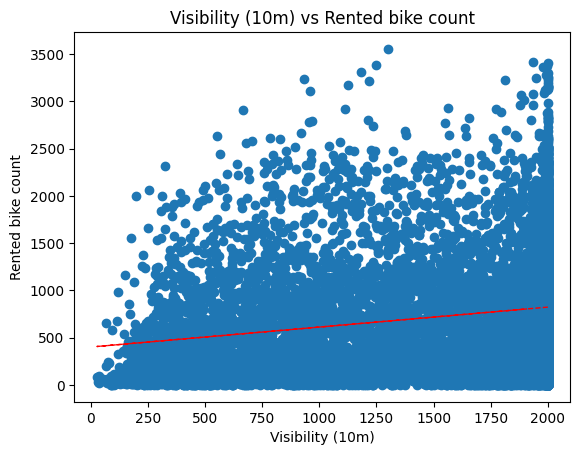

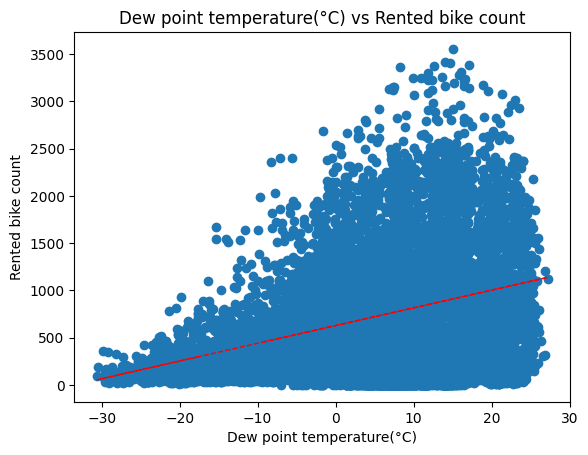

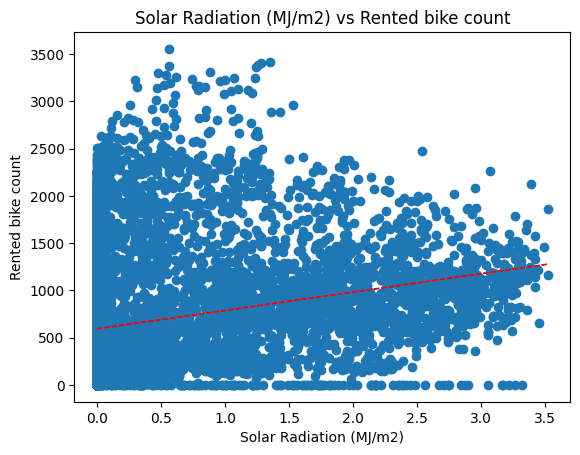

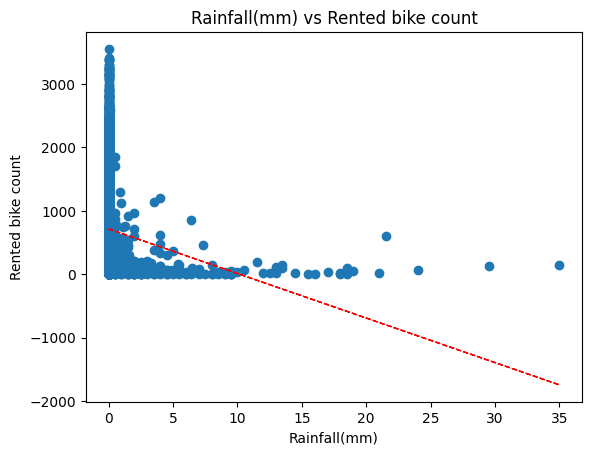

In [63]:
# Lets check the linear relationship with dependent variable. , alpha=0.5

for feat in numerical_features[1:-1]:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented Bike Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

- To check the linear relationship between feature and  Rented bike count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Categorical features Analysis**

---



1. Barplot wrt to dependent var
2. Boxplot wrt to dependent var
3. scatter plot wrt dependent var to check colinear relation.

In [41]:
# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning Day', 'Holiday', 'Month', 'Seasons', 'Weekday'}

#### **1. Barplot wrt to dependent var**

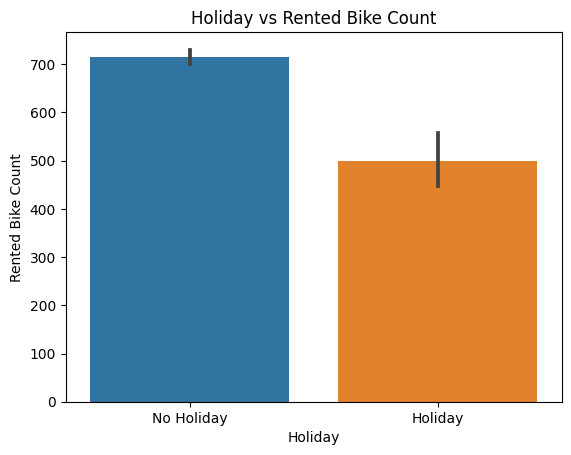

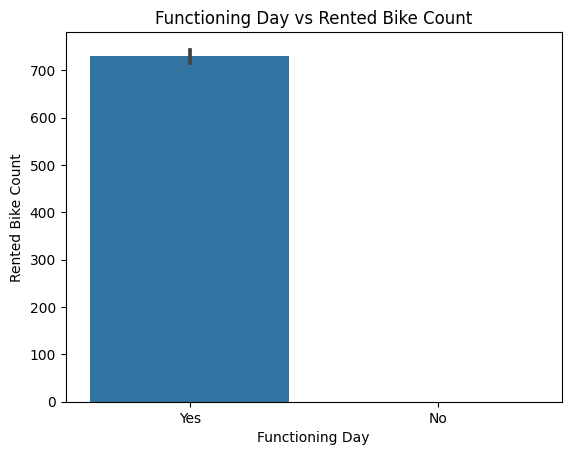

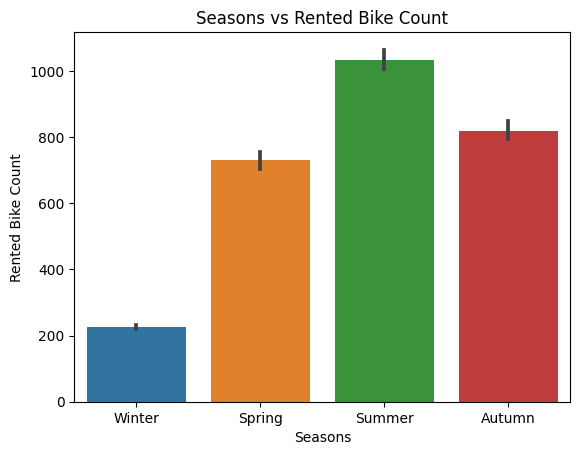

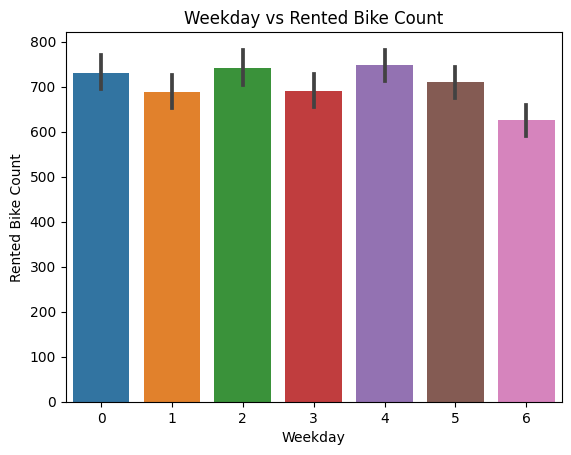

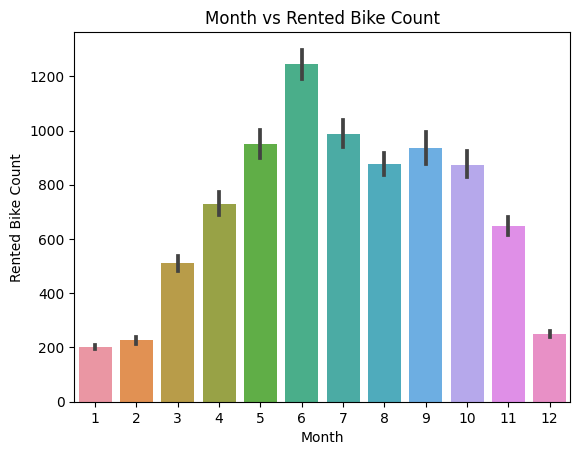

In [49]:
# Chart - 5 visualization code
for feat in categorical_features:

    # Subplot 2: Boxplot
    sns.barplot(x = df[feat], y = df['Rented Bike Count'])
    plt.title(f'{feat} vs Rented Bike Count')

    # Show the plot
    plt.show()

##### 1. Why did you pick the specific chart?

- Barplot is picked to see the dependency of dependent variable and categorical featrues.

##### 2. What is/are the insight(s) found from the chart?

- All the features has impact on the dependent variable.
- We need to figure out weather the weekday is important feature to be added or not as functioning day and Holiday are already given.





#### **2. Boxplot wrt to dependent var**

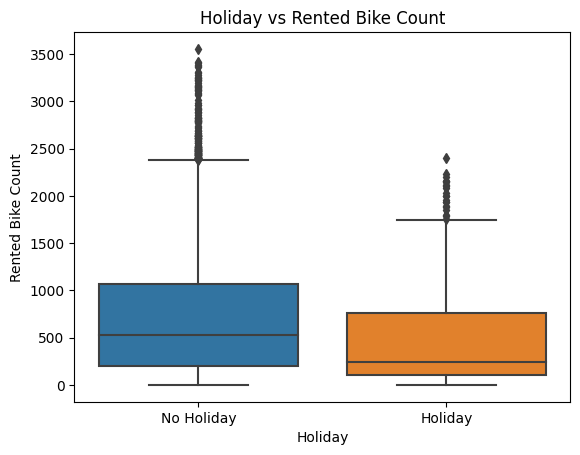

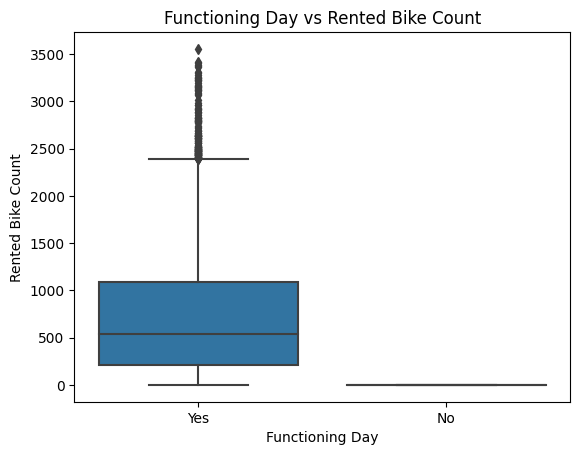

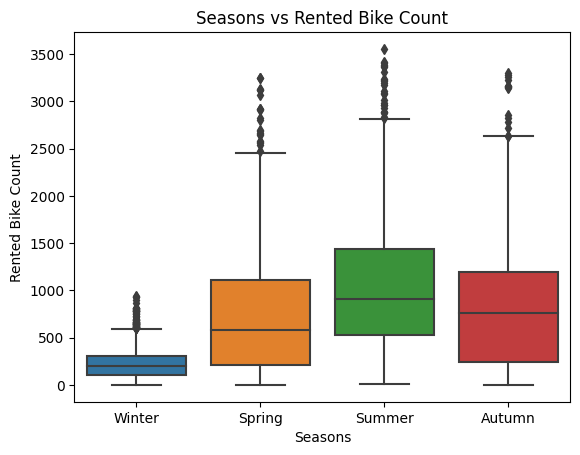

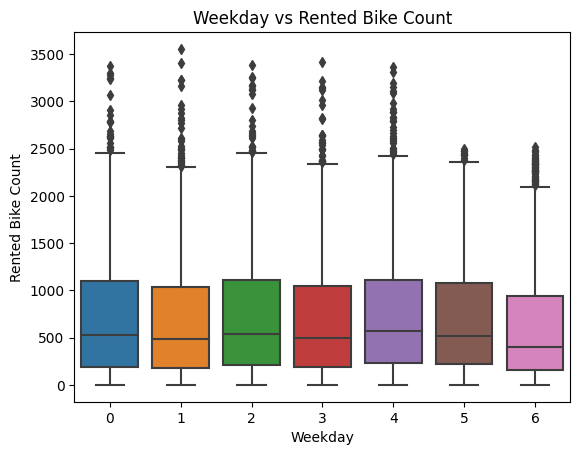

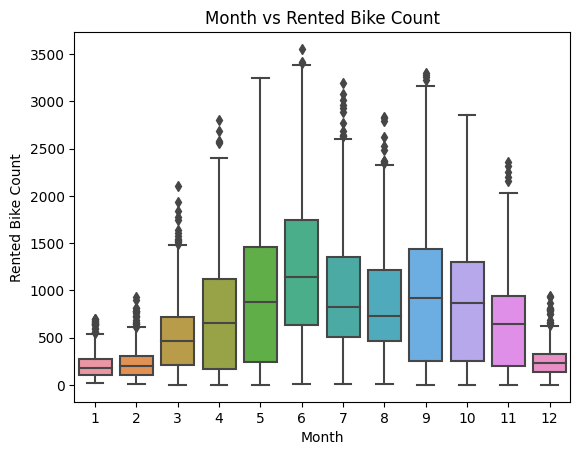

In [48]:
# Boxplot is drawn wrt Rented bike count for all the categorical features.

for feat in categorical_features:

    # Boxplot
    sns.boxplot(x = df[feat], y = df['Rented Bike Count'])
    plt.title(f'{feat} vs Rented Bike Count')

    # Show the plot
    plt.show()

Why did you pick the specific chart?

Answer Here.

What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **3. Scatter plot wrt dependent var to check colinear relation.**

In [ ]:
# Chart - 6 visualization code
for feat in categorical_features:

    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented Bike Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Correlation Heatmap**

<ipython-input-65-8e231af346c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

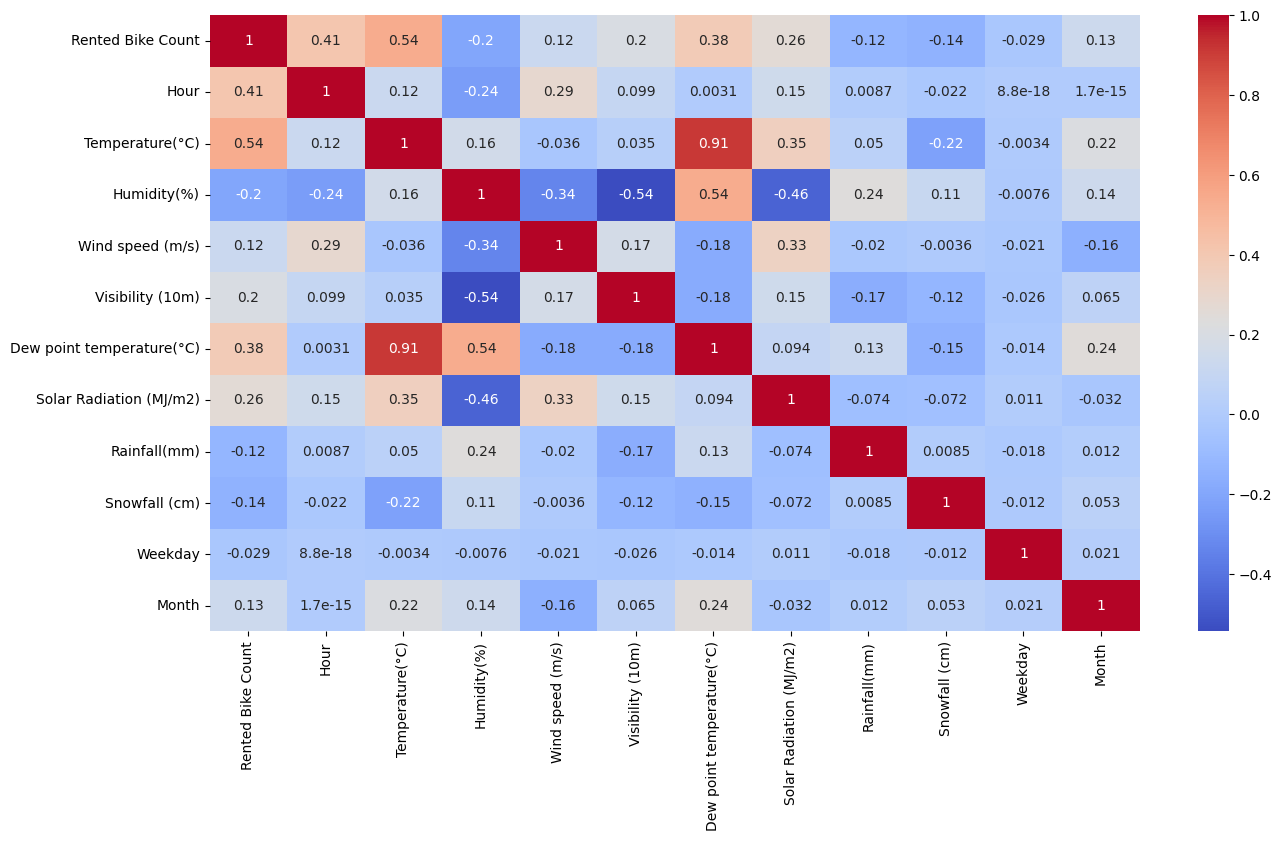

In [65]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is pick to find the correlation of different features with Rented bike count and features with each other.

##### 2. What is/are the insight(s) found from the chart?

- Rented bike count has more correlation with Hour and Temperature.
- Weekday has no correlation with bike count so we can drop it.
- Temperature is highly correlated with Dew point temperature.

### **Pair Plot**

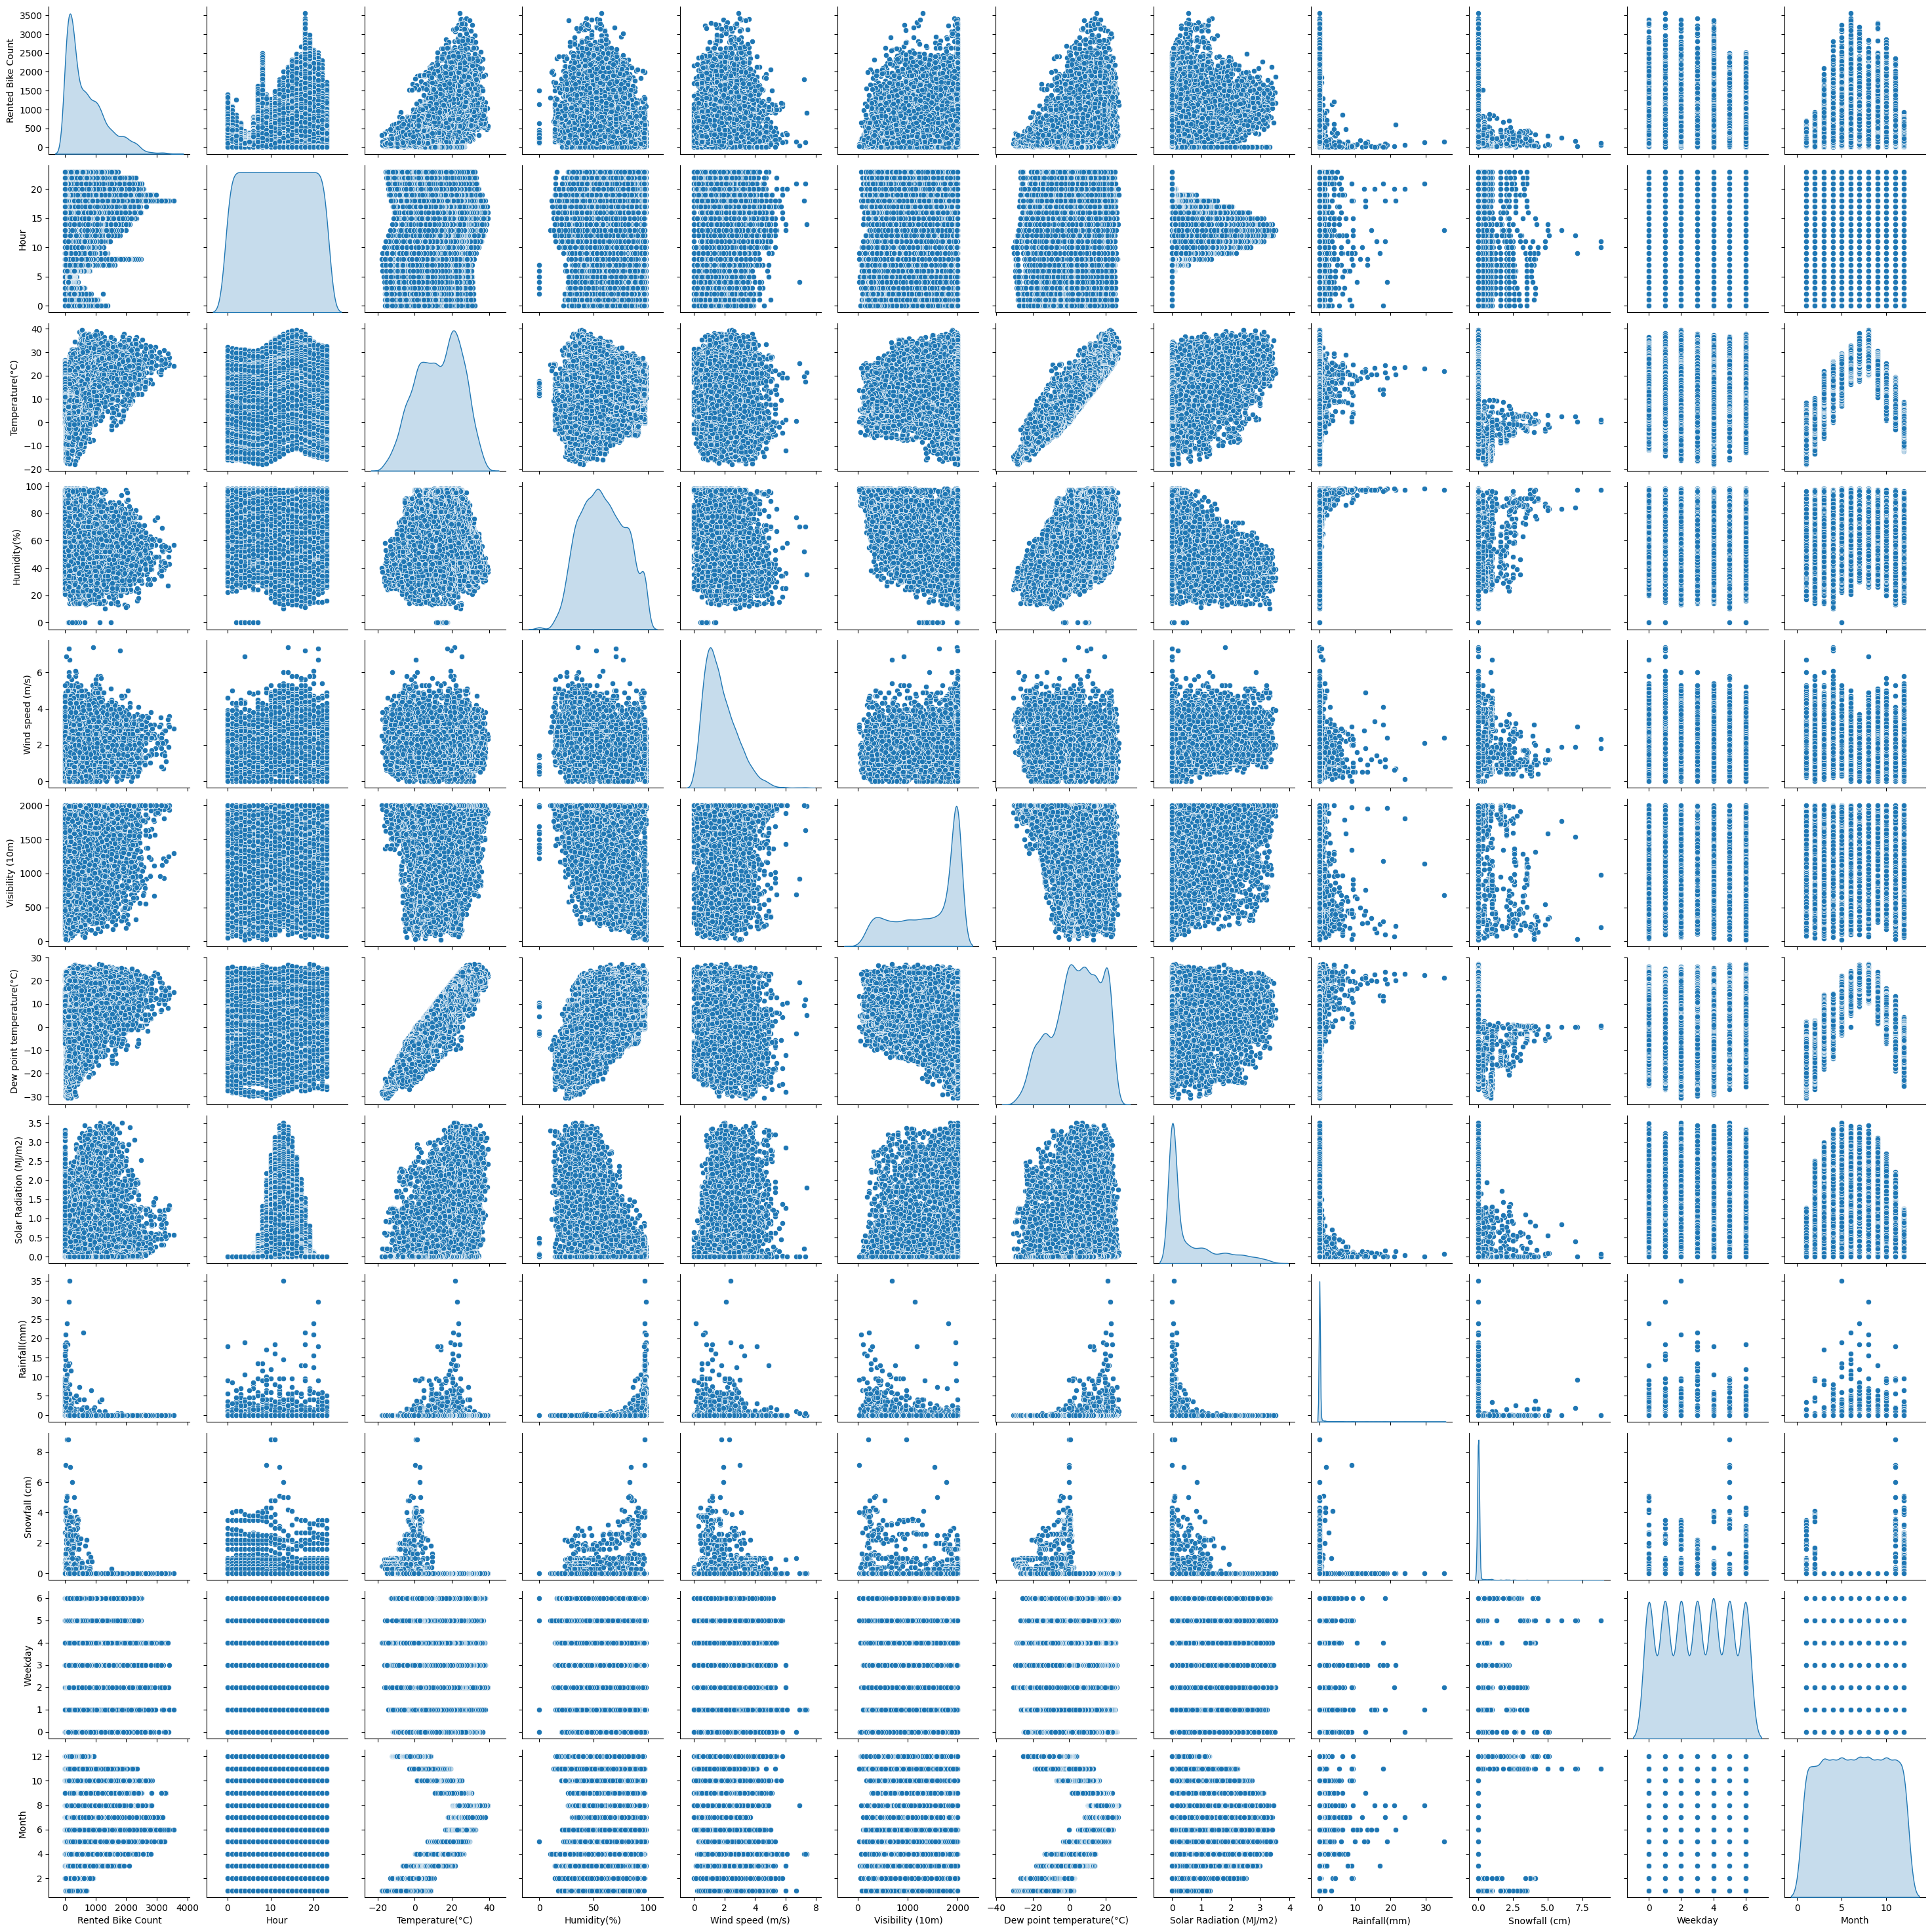

In [68]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***